In [57]:
import numpy

In [58]:
from matplotlib import pyplot

In [59]:
%matplotlib inline

In [60]:
from matplotlib import rcParams

In [61]:
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [62]:
#Creating necessary variables
nx=80
dx=2/(nx-1)
nt=25
dt=0.02
c=1  #wavespeed
x=numpy.linspace(0,2,nx) #Array for my X grid points

In [63]:
print(x)

[ 0.          0.02531646  0.05063291  0.07594937  0.10126582  0.12658228
  0.15189873  0.17721519  0.20253165  0.2278481   0.25316456  0.27848101
  0.30379747  0.32911392  0.35443038  0.37974684  0.40506329  0.43037975
  0.4556962   0.48101266  0.50632911  0.53164557  0.55696203  0.58227848
  0.60759494  0.63291139  0.65822785  0.6835443   0.70886076  0.73417722
  0.75949367  0.78481013  0.81012658  0.83544304  0.86075949  0.88607595
  0.91139241  0.93670886  0.96202532  0.98734177  1.01265823  1.03797468
  1.06329114  1.08860759  1.11392405  1.13924051  1.16455696  1.18987342
  1.21518987  1.24050633  1.26582278  1.29113924  1.3164557   1.34177215
  1.36708861  1.39240506  1.41772152  1.44303797  1.46835443  1.49367089
  1.51898734  1.5443038   1.56962025  1.59493671  1.62025316  1.64556962
  1.67088608  1.69620253  1.72151899  1.74683544  1.7721519   1.79746835
  1.82278481  1.84810127  1.87341772  1.89873418  1.92405063  1.94936709
  1.97468354  2.        ]


In [64]:
#setting initial conditions
u=numpy.ones(nx) #creates an array that has nx cells and setes all the values to 1

In [65]:
print(u)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.]


In [66]:
lbound=numpy.where(x>= 0.5)
ubound=numpy.where( x<=1 )

In [67]:
print(lbound)

(array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79], dtype=int64),)


In [68]:
print(ubound)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int64),)


these are indices for "X"

In [69]:
#intersecting indices for "X"
bounds=numpy.intersect1d(lbound, ubound)
u[bounds]=2
print(bounds)
print(u)

[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.]


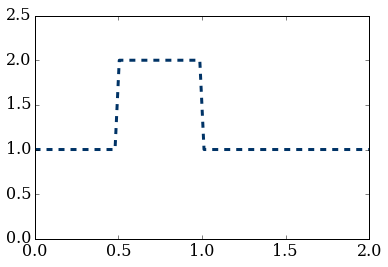

In [70]:
pyplot.plot(x, u, color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);

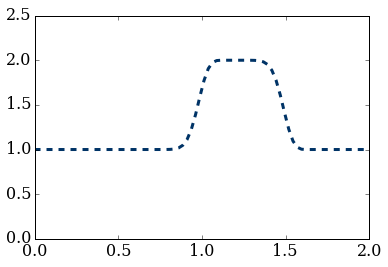

In [71]:

for n in range(1, nt): #25 time steps
    un=u.copy()
    for i in range(1,nx):
        u[i]= un[i]-c*dt/dx*(un[i]-un[i-1])
        
pyplot.plot(x, u, color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);

making the grid spacing finer, going from 41 to 81 halps get back the orignial shape of the square wave!!

now on to non=linear equations:

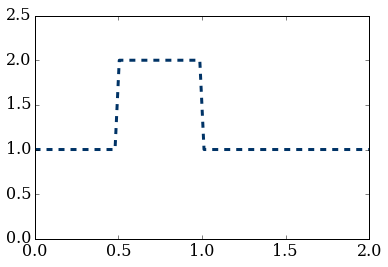

In [72]:


##problem parameters
nx = 80
dx = 2/(nx-1)
nt = 10    
dt = .02  

##initial conditions
u = numpy.ones(nx)      
u[numpy.intersect1d(lbound, ubound)]=2  

pyplot.plot(x, u, color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);


In [73]:
for n in range(1, nt):  
    un = u.copy() 
    u[1:] = un[1:]-un[1:]*dt/dx*(un[1:]-un[0:-1]) 
    u[0] = 1.0

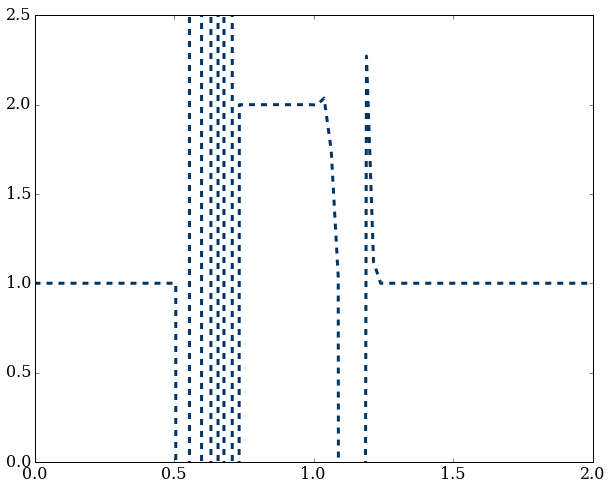

In [76]:
pyplot.figure(figsize=(10,8))
pyplot.plot(x, u, color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);

In [75]:




from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())
